#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 8

### Due: Monday, Mar 28th at 11.00am CST<span style="color:white">By: Jack Tsenane </span>

The completed lecture notebook must also be submitted by 11:00am Central Time on March 28th.

---

## Problem 1

**Phased LINEAR light curves**


Using the code snipplet below, load LINEAR light curves.


Extend the code to:

a) plot the light curves

b) compute the best period using a Fourier transformation

c) plot the phased data and best-fit curves.

d) Solve the problem by using Lomb-Scargle Periodograms.


In [31]:
from __future__ import print_function, division
import numpy as np
from matplotlib import pyplot as plt
from astroML.utils.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample
import math

#----------------------------------------------------------------------
# This Function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)
import matplotlib
matplotlib.rc('_internal', classic_mode=True)

#------------------------------------------------------------
# Load the dataset
data = fetch_LINEAR_sample()
ids = [14752041, 1009459, 10022663, 10025796, 11375941, 18525697]


#------------------------------------------------------------
# Compute the best frequencies
@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for {0} ({1} points)".format(i, len(t)))
        kwargs = dict(generalized=generalized)
        
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]
    return results

results = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

@pickle_results: using precomputed results from 'LINEAR_LS.pkl'


### Solution

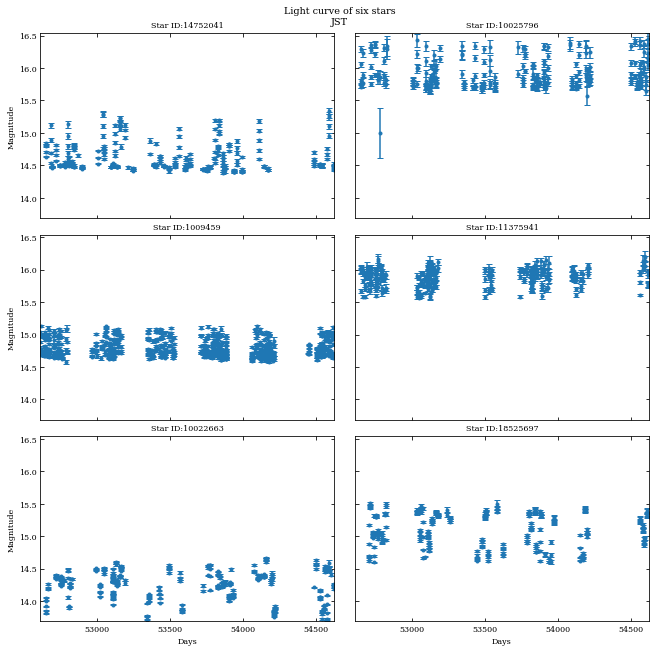

In [32]:
#Plot light curves
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(9, 9), sharex=True, sharey=True)
fig.suptitle('Light curve of six stars\nJST')
fig.tight_layout()

for i in ids:
    #Load data
    t, y, dy = data[i].T

    #Plot
    j = ids.index(i)
    row = j%3
    col = math.floor(j/3)
    ax[row,col].errorbar(t, y, dy, fmt='.')
    ax[row,col].set_title('Star ID:'+str(i))
    
#Ajust plot labels
for a in ax.flat:
    a.set(xlabel='Days', ylabel='Magnitude')
for a in ax.flat:
    a.label_outer()  

Star ID:  14752041 Best Period:  17.21695506144702
Star ID:  1009459 Best Period:  51.106008075157476
Star ID:  10022663 Best Period:  10.200626760943159
Star ID:  10025796 Best Period:  45.554935027919875
Star ID:  11375941 Best Period:  58.445122771779104
Star ID:  18525697 Best Period:  10.82722771749013


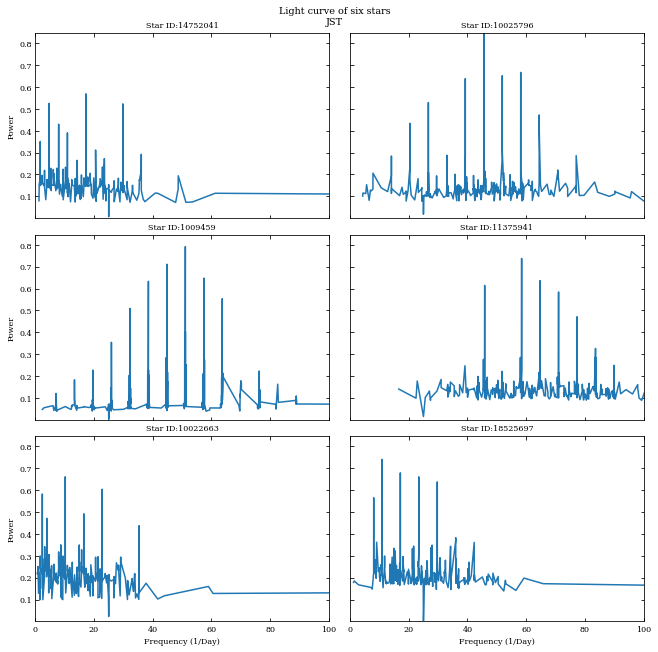

In [33]:
#Get best Periods
bestPeriod = []
for starID in ids:
    maxFlux_index = np.argmax(results[starID][1]) #Find index highest flux on periodogram
    optimalPeriod = results[starID][0][maxFlux_index]#Compute period at maxFlux
    print("Star ID: ", starID,"Best Period: ", optimalPeriod)
    bestPeriod.append(optimalPeriod)
    
#Plot
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(9, 9), sharex=True, sharey=True)
fig.suptitle('Light curve of six stars\nJST')
fig.tight_layout()
for i in ids:
    j = ids.index(i)
    row = j%3
    col = math.floor(j/3)
    t, y, dy = data[i].T
    
    ax[row,col].plot(results[i][0], results[i][1])
    ax[row,col].set_title('Star ID:'+str(i))
    ax[row,col].set_xlim(0,100)
    
for a in ax.flat:
    a.set(xlabel='Frequency (1/Day)', ylabel='Power')
for a in ax.flat:
    a.label_outer()

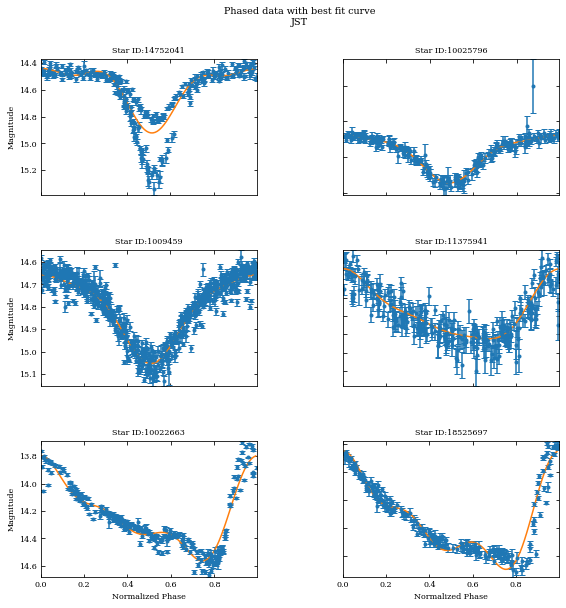

In [34]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(9, 9), sharex=False, sharey=False)
fig.suptitle('Phased data with best fit curve\nJST')
fig.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i in range(len(ids)):
    #Get data 
    t, y, dy = data[ids[i]].T
    t = t - t[0]
    
    #Generate best fit curve
    result = MultiTermFit(bestPeriod[i], 3)
    result.fit(t, y, dy)
    phase_fit, y_fit, phased_t = result.predict(100, return_phased_times=True)

    #Plotting
    row = i%3
    col = math.floor(i/3)
    ax[row,col].errorbar(phased_t, y, dy, fmt='.')
    ax[row,col].plot(phase_fit, y_fit)
    ax[row,col].set_title('Star ID:'+str(ids[i]))
    ax[row,col].invert_yaxis()
    
for a in ax.flat:
    a.set(xlabel='Normalized Phase', ylabel='Magnitude')
for a in ax.flat:
    a.label_outer()